In [1]:
# Practical 1: Exploratory Data Analysis on Cricket Players

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")


In [3]:
# ------------------------------------------------
# Step 1: Create a synthetic cricket dataset
# ------------------------------------------------

np.random.seed(42)  # For reproducibility

num_players = 50

data = {
    "Player": [f"Player_{i+1}" for i in range(num_players)],
    "Age": np.random.randint(18, 40, num_players),
    "Matches": np.random.randint(10, 200, num_players),
    "Runs": np.random.randint(100, 10000, num_players),
    "Not_Outs": np.random.randint(0, 50, num_players),
    "Wickets": np.random.randint(0, 300, num_players)
}


In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,Player,Age,Matches,Runs,Not_Outs,Wickets
0,Player_1,24,181,5992,19,159
1,Player_2,37,17,3661,29,197
2,Player_3,32,184,6284,10,246
3,Player_4,28,44,3199,27,202
4,Player_5,25,90,6378,24,183


In [6]:
# Calculate batting average (Runs / (Innings - Not Outs))
# Assume innings ≈ matches for simplicity
df["Batting_Average"] = df["Runs"] / (df["Matches"] - df["Not_Outs"] + 1)


In [7]:
# Display first few rows
print("🏏 Cricket Player Dataset Preview:")
print(df.head())


🏏 Cricket Player Dataset Preview:
     Player  Age  Matches  Runs  Not_Outs  Wickets  Batting_Average
0  Player_1   24      181  5992        19      159        36.760736
1  Player_2   37       17  3661        29      197      -332.818182
2  Player_3   32      184  6284        10      246        35.908571
3  Player_4   28       44  3199        27      202       177.722222
4  Player_5   25       90  6378        24      183        95.194030


In [8]:
# ------------------------------------------------
# Step 2: Summary Statistics
# ------------------------------------------------
print("\n📊 Summary Statistics:")
print(df.describe())



📊 Summary Statistics:
             Age     Matches         Runs   Not_Outs     Wickets  \
count  50.000000   50.000000    50.000000  50.000000   50.000000   
mean   29.440000  100.560000  5311.360000  24.760000  163.700000   
std     6.618342   57.992315  2683.786852  15.430635   74.627579   
min    18.000000   11.000000   306.000000   0.000000    1.000000   
25%    24.000000   53.250000  3200.250000  11.250000  122.250000   
50%    29.000000   94.000000  6003.500000  26.500000  150.500000   
75%    36.000000  147.250000  7442.500000  37.500000  225.750000   
max    39.000000  199.000000  9889.000000  48.000000  297.000000   

       Batting_Average  
count        50.000000  
mean               inf  
std                NaN  
min        -474.181818  
25%          27.314675  
50%          57.670170  
75%         146.839417  
max                inf  


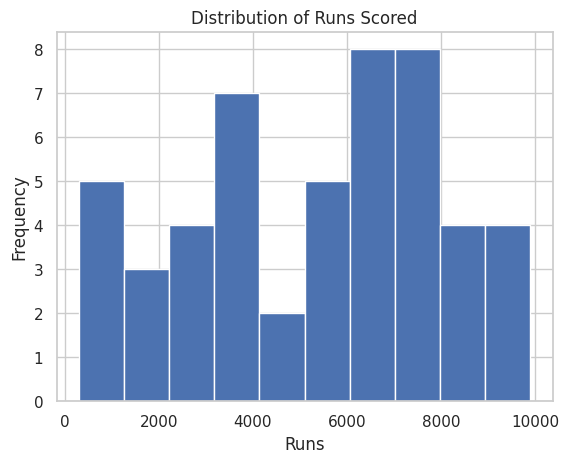

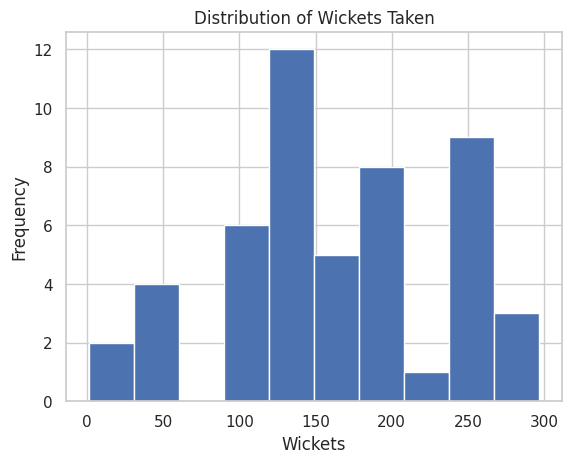

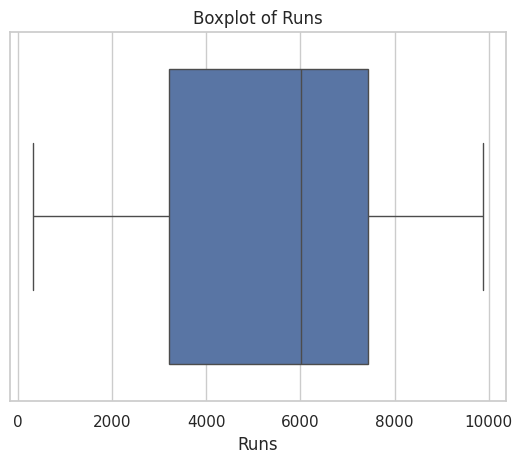

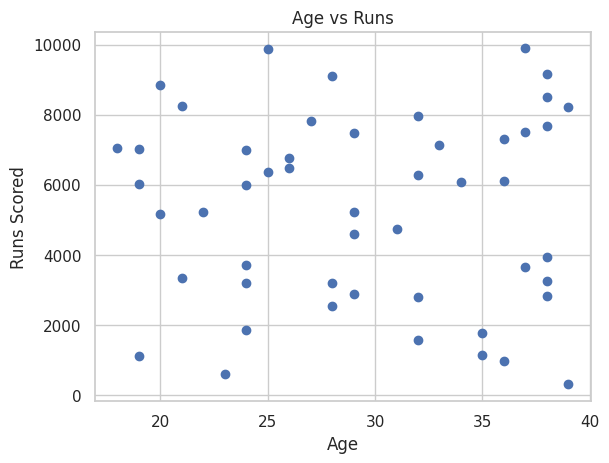

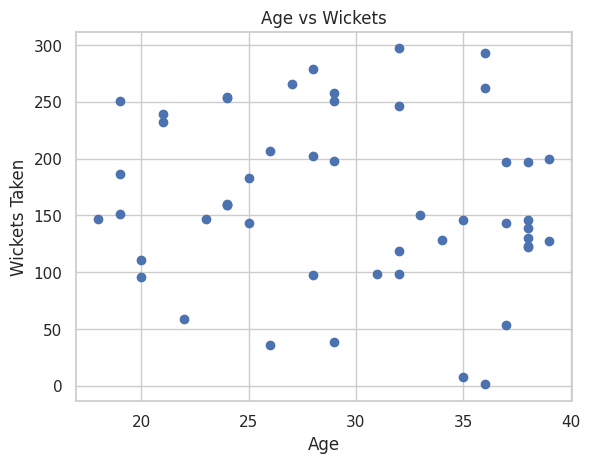

In [9]:
# ------------------------------------------------
# Step 3: Visualizations
# ------------------------------------------------

# Histogram of Runs
plt.figure()
plt.hist(df["Runs"])
plt.title("Distribution of Runs Scored")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

# Histogram of Wickets
plt.figure()
plt.hist(df["Wickets"])
plt.title("Distribution of Wickets Taken")
plt.xlabel("Wickets")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Runs
plt.figure()
sns.boxplot(x=df["Runs"])
plt.title("Boxplot of Runs")
plt.show()

# Scatter plot Age vs Runs
plt.figure()
plt.scatter(df["Age"], df["Runs"])
plt.title("Age vs Runs")
plt.xlabel("Age")
plt.ylabel("Runs Scored")
plt.show()

# Scatter plot Age vs Wickets
plt.figure()
plt.scatter(df["Age"], df["Wickets"])
plt.title("Age vs Wickets")
plt.xlabel("Age")
plt.ylabel("Wickets Taken")
plt.show()




📎 Correlation Matrix:
                      Age   Matches      Runs  Not_Outs   Wickets  \
Age              1.000000  0.221711 -0.027969  0.103570 -0.141866   
Matches          0.221711  1.000000 -0.063779  0.154687  0.061927   
Runs            -0.027969 -0.063779  1.000000 -0.087736 -0.179954   
Not_Outs         0.103570  0.154687 -0.087736  1.000000 -0.023741   
Wickets         -0.141866  0.061927 -0.179954 -0.023741  1.000000   
Batting_Average  0.052954 -0.183302  0.200902 -0.074700 -0.278356   

                 Batting_Average  
Age                     0.052954  
Matches                -0.183302  
Runs                    0.200902  
Not_Outs               -0.074700  
Wickets                -0.278356  
Batting_Average         1.000000  


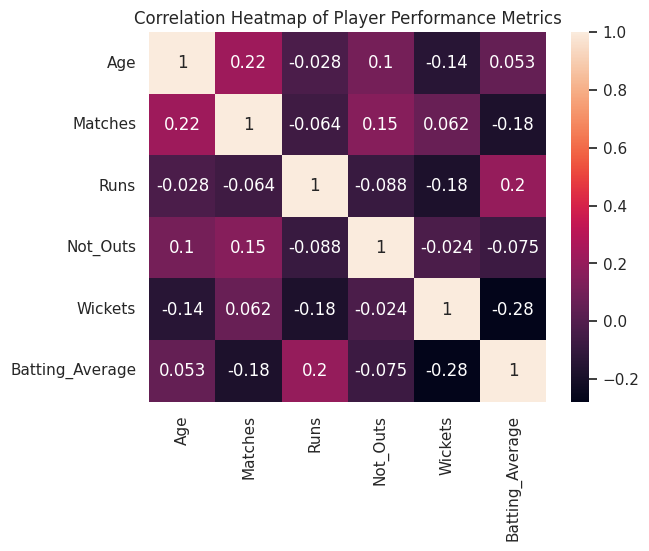

In [10]:
# ------------------------------------------------
# Step 4: Correlation Analysis
# ------------------------------------------------
corr_matrix = df[["Age", "Matches", "Runs", "Not_Outs", "Wickets", "Batting_Average"]].corr()

print("\n📎 Correlation Matrix:")
print(corr_matrix)

# Heatmap visualization
plt.figure()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap of Player Performance Metrics")
plt.show()